# Analysis of the King County, USA 

In [4]:
import pandas as pd
import numpy as np
import csv
import matplotlib as plt
import seaborn as sns

### Question 1:
Read in the data as a dataframe:

In [16]:
df = pd.read_csv('kc_house_data.csv', encoding='utf-8')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Question 2:
Get dataset info and datatype by using dtypes or info()

In [24]:
#df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

df.drop(columns=['id'], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)
df.describe()

### Question 3:
Count the number of houses with unique floor values:

In [20]:
count_unique_floors = df.floors.value_counts().to_frame()
count_unique_floors

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


### Question 4: 
Use the function boxplot in the seaborn library to produce a plot that can be used to determine whether houses with a waterfront view or without a waterfront view have more price outliers. Your output should look like this with the code that produced it (the colors may be different ) :

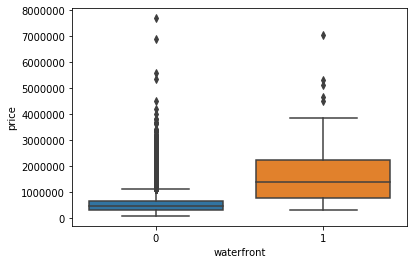

In [28]:
sns.boxplot(x=df['waterfront'],y=df['price'])

### Question 5: Part A
Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price.

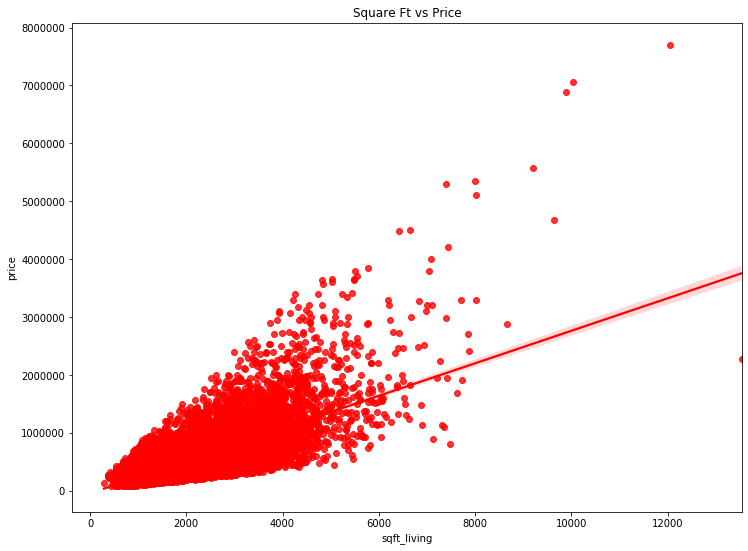

In [61]:
plt.pyplot.figure(figsize = (12,9))
sns.regplot(df['sqft_living'], df['price'],color='red')
plt.pyplot.title('Square Ft vs Price')
plt.pyplot.show()

### Question 5: Part B
Fit a linear regression model to predict the price using the feature 'sqft_living' then calculate the R^2.


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
lm = LinearRegression()
x = (df['sqft_living'].to_numpy()).reshape(-1, 1)
y = df.price
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
r_score = r2_score(y_test, y_pred)
r_score

0.49968141332362914

### Question 5: Part C
Fit a linear regression model to predict the 'price' using the list of features:

    "floors"
    "waterfront"
    "lat"
    "bedrooms"
    "sqft_basement"
    "view"
    "bathrooms"
    "sqft_living15"
    "sqft_above"
    "grade"
    "sqft_living"
    
The calculate the R^2.

In [40]:
lm1 = LinearRegression()
x = df[["floors","waterfront","lat","bedrooms","sqft_basement","view","bathrooms","sqft_living15","sqft_above","grade","sqft_living"]].values
y = df.price
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
lm1.fit(X_train, y_train)
y_pred = lm1.predict(X_test)
r_score = r2_score(y_test, y_pred)
r_score

0.6560566236808123

### Question 6: 
Create a pipeline object that scales the data performs a polynomial transform and fits a linear regression model. Fit the object using the features in the question above, then fit the model and calculate the R^2.

In [42]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

Input = [('scale', StandardScaler()),('polynomial',PolynomialFeatures(degree=2)),('mode', LinearRegression())]
pipe = Pipeline(Input)

In [44]:
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
r_score = r2_score(y_test, y_pred)
r_score

0.7169733262174018

### Question 7:
Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculate the R^2 using the test data. 

In [45]:
from sklearn.linear_model import Ridge

rm = Ridge(alpha=0.1)
rm.fit(X_train, y_train)
y_pred = rm.predict(X_test)
r_score = r2_score(y_test, y_pred)
r_score

0.6561740068428021

### Question 8:
Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, setting the regularisation parameter to 0.1. Calculate the R^2 utilising the test data provided.

In [55]:
pm = PolynomialFeatures(degree=2)
X_poly = pm.fit_transform(x)  
pm.fit(X_poly, y) 

rm = Ridge(alpha=0.1)
rm.fit(X_poly, y)
y_pred = rm.predict(pm.fit_transform(X_test))
r_score = r2_score(y_test, y_pred)
r_score

0.735049950085104

Performed Polynomial Transformation to a second degree on both trainign and testing data. Then created a Ridge model and then the fitted the data on the model.